# Handwritten digit recognition on the MNIST dataset with TensorFlow

Following the MNIST tutorial from Tensorflow:

https://www.tensorflow.org/get_started/mnist/beginners

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

## The MNIST dataset, which is found at:

http://yann.lecun.com/exdb/mnist/

But tensorflow has built-in scripts to pull the data and load it in:

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Some examples

In [3]:
def showimg(img):
    plt.imshow((img).reshape([28,28]), cmap='gray_r');

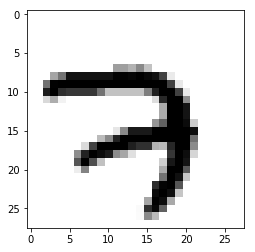

In [4]:
showimg(mnist.train.images[0])

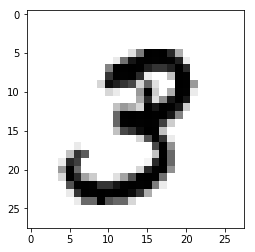

In [5]:
showimg(mnist.train.images[1])

In [6]:
# - Input. This will be an array of images, with each image containing 784 pixels.
x = tf.placeholder(tf.float32, [None,784])

# - Weights. 784 pixel -> 10 digits.
W = tf.Variable(tf.zeros([784,10]))

# - Biasses. 10 biases for each digit.
b = tf.Variable(tf.zeros([10]))

## Implementing the model

Evidence:

\begin{equation}
\text{evidence}_{i} = \sum\limits_{j} W_{i,j} x_{j} + b_{i} 
\end{equation}

Softmax function is defined as:

\begin{equation}
\text{softmax}(x)_{i} = \frac{\exp(x_{i})}{\sum\limits_{j} \exp(x_{j)}}
\end{equation}

Output will be a 10 dimensional vector, which can be interpreted as the normalised probabilities for each digit:

\begin{equation}
\vec{y} = \text{softmax}( \vec{\text{evidence}} ) = \text{softmax} \left[ \mathbf{W} \vec{x} + \vec{b}   \right]
\end{equation}

In [7]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

## Defining the loss function

We'll use the cross entropy function:

\begin{equation}
H_{y'}(y) = - \sum\limits_{i} y_{i}' \log(y_{i}),
\end{equation}

here the index $i$ goes over the second component of the $y$ vector, which correspond to the different digits.

Recommended reading here:

http://colah.github.io/posts/2015-09-Visual-Information/

Notation:
- $y'$: true probability distribution. In this case it is a one-hot vector, $y'=(0,0,...,1,0)$, which only has one element with value 1.
- $y$: predicted probability distribution

In [8]:
y_ = tf.placeholder(tf.float32, [None, 10])

tf.reduce_mean: Computes the mean of elements across dimensions of a tensor.

In [9]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

**Note:**
- This formulation is numerically unstable. Instead, we apply `tf.nn.softmax_cross_entropy_with_logits` on the unnormalized logits (e.g., we call `softmax_cross_entropy_with_logits` on `tf.matmul(x, W) + b)`, because this more numerically stable function internally computes the softmax activation. In your code, consider using `tf.nn.softmax_cross_entropy_with_logits` instead.

## Optimization algorithm


We are using the Gradient Descent Optimizer, but there are many other:
https://www.tensorflow.org/api_guides/python/train#Optimizers

In [10]:
learning_rate = 0.5
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

## Launching the model

In [11]:
sess = tf.InteractiveSession()

In [12]:
tf.global_variables_initializer().run()

Train using small batches: stochastic training.

Since our optimization algorithm is stochastic gradient descent: Stochastic gradient descent (SGD)

In [13]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

Each step of the loop, we get a "batch" of one hundred random data points from our training set. We run train_step feeding in the batches data to replace the placeholders.

## Evaluating the model

`tf.argmax`:
Returns the index with the largest value across axes of a tensor.

In [14]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

tf.cast: Casts a tensor to a new type.

In [15]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [16]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.919


List of results online:

https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results

## Sandbox

In [17]:
getlabel = y

In [18]:
prediction = sess.run(getlabel, feed_dict={x: mnist.test.images[:1], y_: mnist.test.labels[:1]})

In [19]:
def getdigit(labels):
    digit = np.argmax(labels)
    return digit

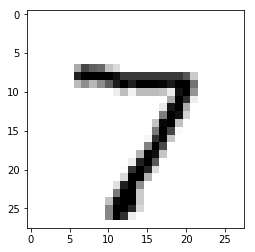

In [20]:
showimg(mnist.test.images[0])

In [21]:
getdigit(mnist.test.labels[0])

7

In [22]:
def showprediction(prediction):
    f,a = plt.subplots()
    digits = range(0,10,1)
    a.plot(digits,prediction[0], marker='*')
    a.set_xlabel('Digit')
    a.set_ylabel('Probability')
    a.xaxis.set_ticks(np.linspace(0.0, 10.0, 11, endpoint=True))

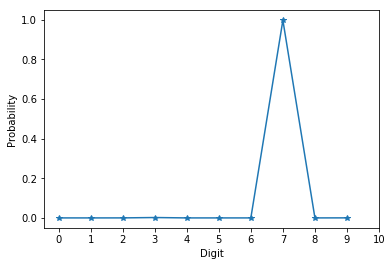

In [23]:
showprediction(prediction)

Find labels which were predicted incorrectly

In [25]:
matches = sess.run(correct_prediction, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

In [33]:
np.where(matches == False)[0]

array([   8,   33,   63,   66,   77,  124,  149,  193,  195,  211,  217,
        233,  241,  245,  247,  259,  290,  300,  307,  313,  318,  320,
        321,  340,  341,  352,  362,  412,  435,  444,  445,  448,  449,
        457,  468,  478,  479,  495,  502,  507,  511,  531,  536,  542,
        543,  551,  565,  569,  571,  578,  582,  591,  610,  613,  619,
        628,  629,  658,  659,  684,  691,  692,  707,  717,  720,  728,
        738,  740,  741,  760,  781,  791,  839,  844,  857,  877,  881,
        898,  924,  938,  939,  947,  950,  956,  959,  965,  982, 1003,
       1012, 1014, 1017, 1032, 1033, 1039, 1044, 1062, 1068, 1073, 1082,
       1096, 1101, 1107, 1112, 1114, 1119, 1157, 1173, 1181, 1182, 1191,
       1192, 1194, 1198, 1202, 1204, 1206, 1217, 1226, 1232, 1234, 1242,
       1247, 1248, 1256, 1260, 1283, 1289, 1299, 1310, 1319, 1325, 1326,
       1328, 1337, 1339, 1347, 1357, 1364, 1391, 1393, 1409, 1410, 1413,
       1433, 1440, 1444, 1453, 1465, 1466, 1467, 14

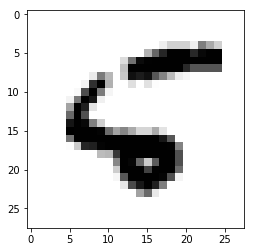

In [34]:
showimg(mnist.test.images[8])

In [39]:
getdigit(mnist.test.labels[8])

5

In [40]:
prediction = sess.run(getlabel, feed_dict={x: mnist.test.images[8:9], y_: mnist.test.labels[8:9]})

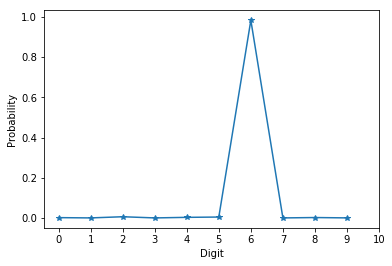

In [41]:
showprediction(prediction)